<a href="https://colab.research.google.com/github/Dalthirr/NeuralNetworks/blob/Model/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import necessary modules

In [1]:
import numpy as np
import pandas as pd
import sklearn
import keras
import seaborn
import matplotlib.pyplot as plt
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
!pip install -q keras_metrics
import keras_metrics
from sklearn.model_selection import cross_validate
!pip install livelossplot
from livelossplot import PlotLossesKeras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
url = 'https://raw.githubusercontent.com/Dalthirr/NeuralNetworks/master/Churn_Modelling.csv'
df=pd.read_csv(url) #Pobieranie danych
df = df.drop(["CustomerId", "Surname", "RowNumber"],
        axis=1)
df = pd.concat([df, pd.get_dummies(df[["Gender", "Geography"]], drop_first=True)],
               sort=False, axis=1).drop(df[["Gender", "Geography"]], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CreditScore          10000 non-null int64
Age                  10000 non-null int64
Tenure               10000 non-null int64
Balance              10000 non-null float64
NumOfProducts        10000 non-null int64
HasCrCard            10000 non-null int64
IsActiveMember       10000 non-null int64
EstimatedSalary      10000 non-null float64
Exited               10000 non-null int64
Gender_Male          10000 non-null uint8
Geography_Germany    10000 non-null uint8
Geography_Spain      10000 non-null uint8
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [0]:
X=df.drop(['Exited'], axis=1)
y=df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

scaler=StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)

X_test_std = scaler.transform(X_test)

X_std=scaler.transform(X)




**Tomek**

In [4]:


# Creating Model, I will build simple networt using Sequential.
model=Sequential()
# Add an input layer shape depends on shape of X. We have 11 columns in X.
model.add(Dense(11, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(51, activation='relu'))



# Add an output layer 
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[keras_metrics.precision(),'accuracy'])
                   
model.fit(X_train_std, y_train,epochs=3, batch_size=1, verbose=1,validation_data=(X_test,y_test))

model.evaluate(X_test_std,y_test)




Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 6700 samples, validate on 3300 samples
Epoch 1/3
6700/6700 [==============================] - 26s 4ms/step - loss: 0.4166 - precision: 0.6673 - acc: 0.8239 - val_loss: 3.8589 - val_precision: 0.2436 - val_acc: 0.7600
Epoch 2/3
6700/6700 [==============================] - 26s 4ms/step - loss: 0.3632 - precision: 0.7266 - acc: 0.8497 - val_loss: 4.1080 - val_precision: 0.2650 - val_acc: 0.7442
Epoch 3/3
3300/3300 [==============================] - 0s 46us/step


[0.34432465993996825, 0.772486772282411, 0.8587878787878788]

In [9]:
y_pred=model.predict_classes(X_test_std)

report=classification_report(y_test,y_pred)
print(report)
'''
predykcja={'predykcja':list(y_pred),'Cel':list(y_test)}
check=pd.DataFrame.from_dict(predykcja)
check
'''

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2628
           1       0.77      0.43      0.56       672

    accuracy                           0.86      3300
   macro avg       0.82      0.70      0.74      3300
weighted avg       0.85      0.86      0.84      3300



"\npredykcja={'predykcja':list(y_pred),'Cel':list(y_test)}\ncheck=pd.DataFrame.from_dict(predykcja)\ncheck\n"

In [0]:

df2=pd.read_csv(url).drop(["CustomerId", "Surname", "RowNumber", "HasCrCard"],
        axis=1)
df2 = pd.concat([df2, pd.get_dummies(df2[["Gender", "Geography"]], drop_first=True)],
               sort=False, axis=1).drop(df2[["Gender", "Geography"]], axis=1)

X2=df2.drop(['Exited'], axis=1)
y2=df2['Exited']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42,stratify=y2)


scaler2=StandardScaler().fit(X_train2)
X_train_std2 = scaler2.transform(X_train2)

X_test_std2 = scaler2.transform(X_test2)

X_std2=scaler2.transform(X2)

class_weight = {
                0: 1.,
                1: 4.
               }

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 4)




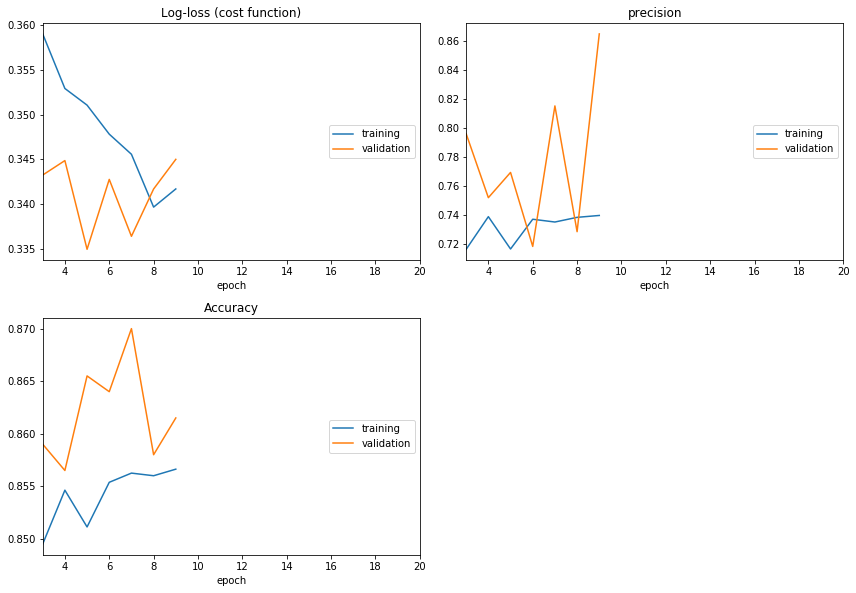

Log-loss (cost function):
training   (min:    0.340, max:    0.419, cur:    0.342)
validation (min:    0.335, max:    0.357, cur:    0.345)

precision:
training   (min:    0.672, max:    0.740, cur:    0.740)
validation (min:    0.718, max:    0.865, cur:    0.865)

Accuracy:
training   (min:    0.827, max:    0.857, cur:    0.857)
validation (min:    0.855, max:    0.870, cur:    0.862)
Epoch 00009: early stopping


In [0]:

model2=Sequential()
model2.add(Dense(20, activation='relu', input_shape=(10,)))


model2.add(Dropout(0.1,))
model2.add(Dense(75, activation='relu'))


model2.add(Dense(1, activation='sigmoid'))


model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[keras_metrics.precision(),'accuracy'])
                   
model2.fit(X_train_std2, y_train2,epochs=20, batch_size=2, verbose=1,validation_data=(X_test_std2,y_test2), callbacks = [PlotLossesKeras(), es])

